<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

## In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification
https://en.wikipedia.org/wiki/CIFAR-10

In [33]:
pwd

'D:\\DSML\\7. Neural Networks'

In [35]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [38]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [40]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 10000 test images

In [47]:
y_train.shape

(50000, 1)

In [49]:
y_train[:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [51]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [54]:
y_train = y_train.reshape(-1,)
y_train[:6]

array([6, 9, 9, 4, 1, 1], dtype=uint8)

In [58]:
y_test = y_test.reshape(-1,)
y_test[:6]

array([3, 8, 8, 0, 6, 6], dtype=uint8)

In [60]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [63]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

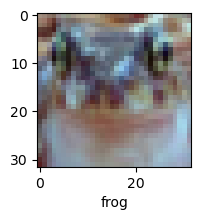

In [65]:
plot_sample(X_train, y_train, 151)

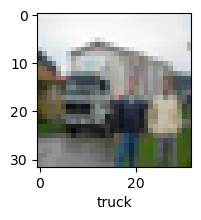

In [67]:
plot_sample(X_train, y_train, 16)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [71]:
#from sklearn.preprocessing import StandardScaler as scaler
#scaler = StandardScaler()
#X_train = scaler(X_train)
#X_test = scaler(X_test)
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network (MLP) for image classification</h4>

In [74]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Users\SENAPATHI\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.3047 - loss: 1.9252
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.4197 - loss: 1.6398
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.4535 - loss: 1.5526
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.4721 - loss: 1.4937
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.4974 - loss: 1.4320


**You can see that at the end of 3 epochs, accuracy is at around 46%**

In [77]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes_mlp = [np.argmax(element) for element in y_pred]

#print("Classification Report: \n", classification_report(y_test, y_pred_classes))
print("Classification Report: \n", confusion_matrix(y_test, y_pred_classes_mlp))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Classification Report: 
 [[611  31  87  17  12  16  61  30  70  65]
 [ 47 571  18  24  11  24  46  22  33 204]
 [108  21 440  56  53  57 191  42  12  20]
 [ 38  19 139 259  20 149 273  46  10  47]
 [ 73  14 284  33 247  28 235  60  10  16]
 [ 24  13 157 137  38 332 211  54  12  22]
 [  5   9 116  28  34  23 751  11   8  15]
 [ 39  19 100  50  61  67 100 498   6  60]
 [182  73  28  22  17  32  34  11 501 100]
 [ 52 139  11  24  13  23  56  44  19 619]]


<h4 style="color:purple">Precision quantifies the number of positive class predictions that actually belong to the positive class</h4>
<h4 style="color:purple">Recall quantifies the number of positive class predictions made out of all positive examples in the dataset</h4>
<h4 style="color:purple">F-Measure provides a single score that balances both the concerns of precision and recall in one number</h4>

<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [81]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\SENAPATHI\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.3721 - loss: 1.7351
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6001 - loss: 1.1449
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6548 - loss: 0.9934
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6879 - loss: 0.9060
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7076 - loss: 0.8421


**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [88]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6860 - loss: 0.9131


[0.9253867268562317, 0.6840000152587891]

In [90]:
y_pred_cnn = cnn.predict(X_test)
y_pred_cnn[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[4.73825959e-03, 4.34941670e-04, 4.81186435e-03, 7.58200049e-01,
        6.67143089e-04, 8.22442397e-02, 4.25743451e-03, 2.56729079e-04,
        1.42840013e-01, 1.54932542e-03],
       [3.34278517e-03, 1.07464366e-01, 1.31820743e-05, 3.19512219e-06,
        1.90779429e-06, 2.87777738e-07, 6.09897697e-08, 5.05197875e-08,
        8.88706744e-01, 4.67343285e-04],
       [3.51549610e-02, 2.26307791e-02, 2.36238493e-03, 1.74681237e-03,
        6.31962495e-04, 2.23200172e-04, 1.82862743e-04, 1.18151562e-04,
        9.26430345e-01, 1.05185602e-02],
       [7.87252605e-01, 2.40787528e-02, 2.55609266e-02, 3.14649614e-03,
        3.55897169e-03, 4.17480260e-05, 4.76143177e-04, 3.83299019e-04,
        1.50306374e-01, 5.19462302e-03],
       [3.59848455e-05, 3.87258697e-05, 3.70858163e-02, 1.04759941e-02,
        7.47287095e-01, 2.42289598e-03, 2.02268511e-01, 8.27742624e-05,
        2.75277678e-04, 2.68559597e-05]], dtype=float32)

In [92]:


y_classes_cnn = [np.argmax(element) for element in y_pred_cnn]
y_classes_cnn[:5]


#print("Classification Report: \n", classification_report(y_test, y_pred_classes))
print("Classification Report: \n", confusion_matrix(y_test, y_classes_cnn))


Classification Report: 
 [[778  14  59  12  18   3   8   2  80  26]
 [ 40 776  15   6   9   1   9   2  47  95]
 [ 69   6 656  32  98  37  50  28  13  11]
 [ 36  11 136 432 113  82  87  44  41  18]
 [ 29   2 111  38 685   6  52  55  20   2]
 [ 24   4 147 178  69 436  28  83  22   9]
 [  8   5  82  37  52  11 777   6  11  11]
 [ 27   5  61  33  90  29   5 710  13  27]
 [ 81  36  26   9   5   2   3   2 819  17]
 [ 44  67  17   7   7   4   9  12  62 771]]


In [94]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

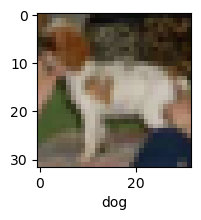

In [96]:
plot_sample(X_test, y_test,12)

In [98]:
classes[y_classes_cnn[12]]

'bird'

In [100]:
classes[y_pred_classes_mlp[12]]

'frog'